In [1]:
import httplib
import pandas as pd
import math
import numpy as np
import pywt
import time
#from datetime import datetime
import Queue
import datetime
from bson.objectid import ObjectId
import pymongo as pm
import statsmodels.tsa.stattools as ts
from pymongo import MongoClient
import matplotlib.pyplot as plt

from pykalman import KalmanFilter
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
from matplotlib import cm
import urllib, json

/home/zheng/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
from earth_analysis import Earth
from hmm_series import model
import plotly
import plotly.graph_objs as go
basic1 = Earth('4.5_month')
basic2 = Earth('significant_month')
basic3 = Earth('2.5_month')

In [4]:
basic1w= Earth('2.5_week')

/home/zheng/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



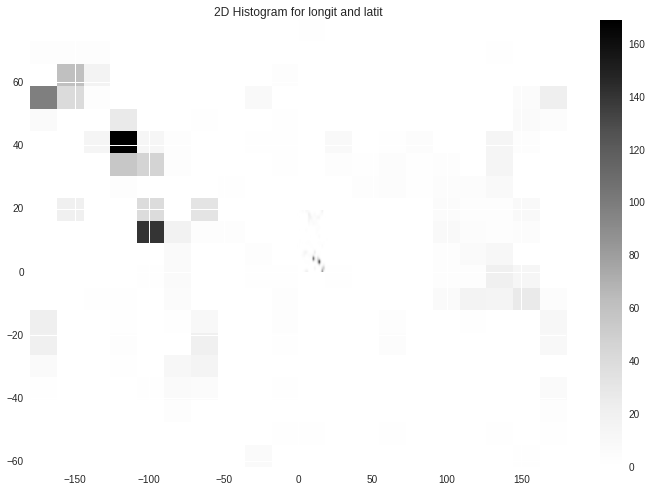

In [5]:
basic3.hist2d_earth('longit','latit')

In [21]:
basic1w.extract_earth()

,depth,latit,longit,mag,place,sig,time
0,62.380,-6.597100,130.744100,4.60,"162km NNW of Saumlaki, Indonesia",326.0,2017-10-10 18:56:40.140
1,10.000,-54.285000,8.636800,6.70,Bouvet Island region,691.0,2017-10-10 18:53:28.050
2,6.090,31.612500,-116.008500,3.03,"54km ESE of Maneadero, B.C., MX",142.0,2017-10-10 17:48:41.460
3,10.780,32.949667,-115.540833,2.48,"3km SSW of Brawley, CA",95.0,2017-10-10 17:24:14.200
4,17.200,51.859600,-178.618100,2.90,"32km W of Tanaga Volcano, Alaska",129.0,2017-10-10 16:51:21.282
5,102.170,16.659300,-94.473900,4.20,"18km NE of Niltepec, Mexico",272.0,2017-10-10 14:43:22.400
6,10.000,-9.200100,-109.671200,5.00,Central East Pacific Rise,385.0,2017-10-10 14:36:02.290
7,5.510,33.499167,-116.801333,2.50,"9km NE of Aguanga, CA",97.0,2017-10-10 13:01:37.980
8,24.300,58.895400,-151.458100,3.50,"83km S of Homer, Alaska",188.0,2017-10-10 11:51:14.151
9,4.030,20.585667,-155.709335,2.90,"34km ESE of Hana, Hawaii",129.0,2017-10-10 10:52:58.640


fit HMM model for mag


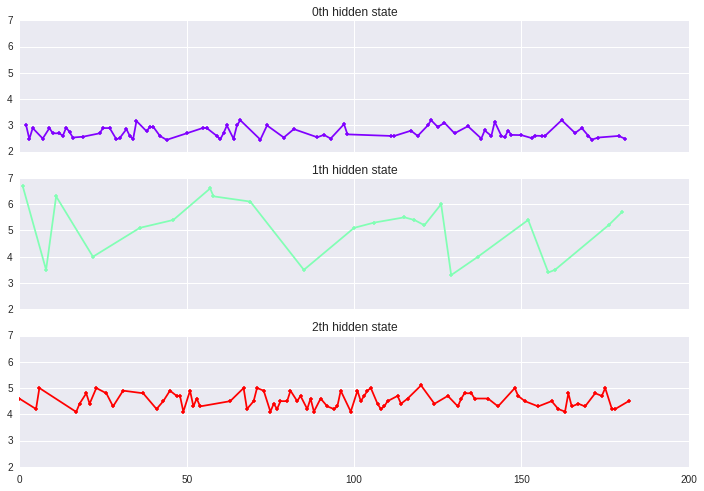

In [6]:
basic1w.hmm_earth('mag',3,200)

fit HMM model for mag


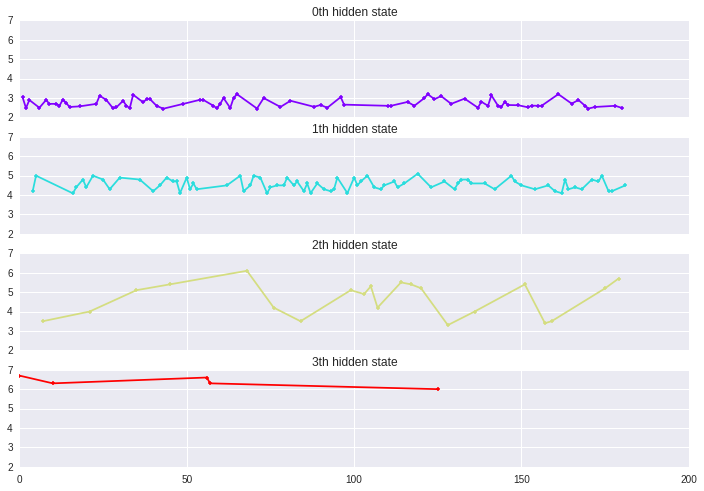

In [6]:
basic1w.hmm_earth('mag',4,200)

fit HMM model for longit


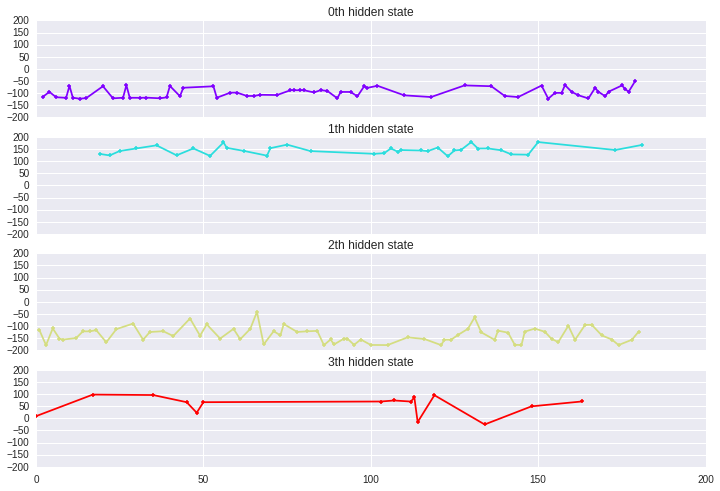

In [7]:
basic1w.hmm_earth('longit',4,200)

fit HMM model for latit


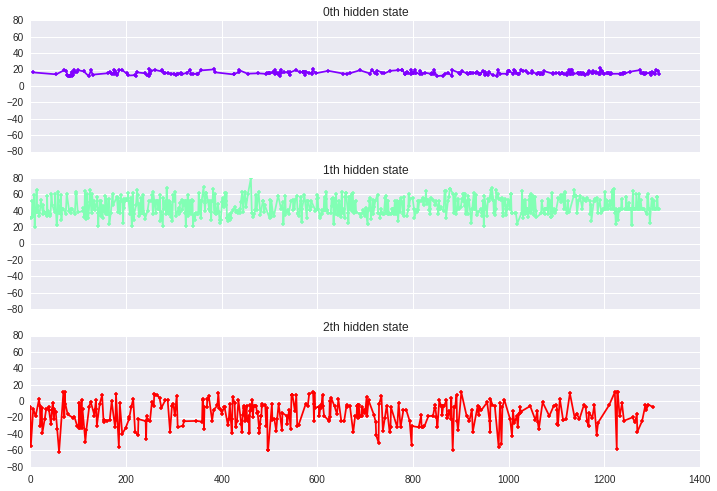

In [6]:
basic3.hmm_earth('latit',3,200)

The array below are three hidden states for the latitude for the earthquake to happen. 
* [20,40,-30]

fit HMM model for longit


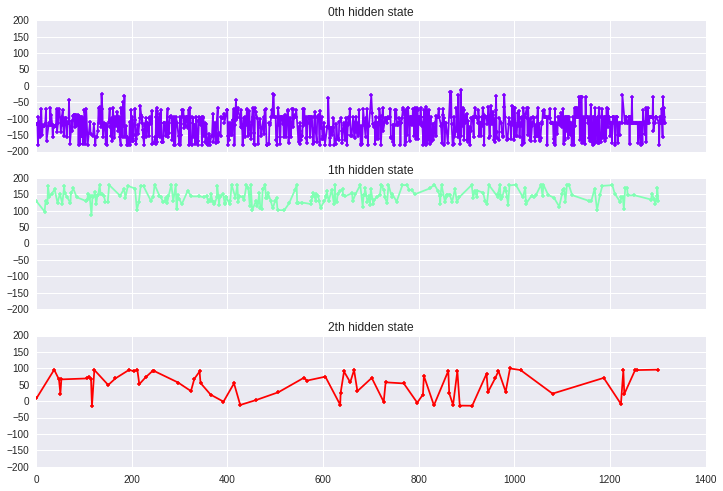

In [7]:
basic3.hmm_earth('longit',3,200)

The array below are three hidden states for the latitude for the earthquake to happen. 
* [-150,150,50]

Looks like the faults on the opposite side of the earth will be affected once an earthquake happens somewhere, which is especially true for ultra deep earthquakes.

fit HMM model for sig


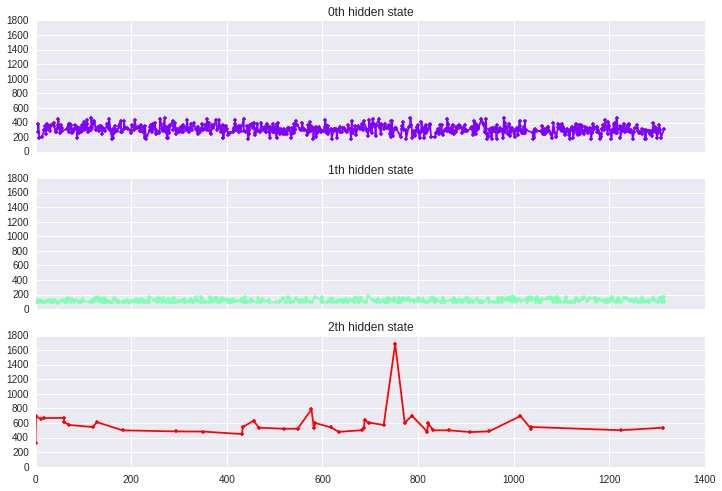

In [8]:
basic3.hmm_earth('sig',3,200)

From the figure above, we know that basically the large earthquakes happen regularly.

fit HMM model for depth


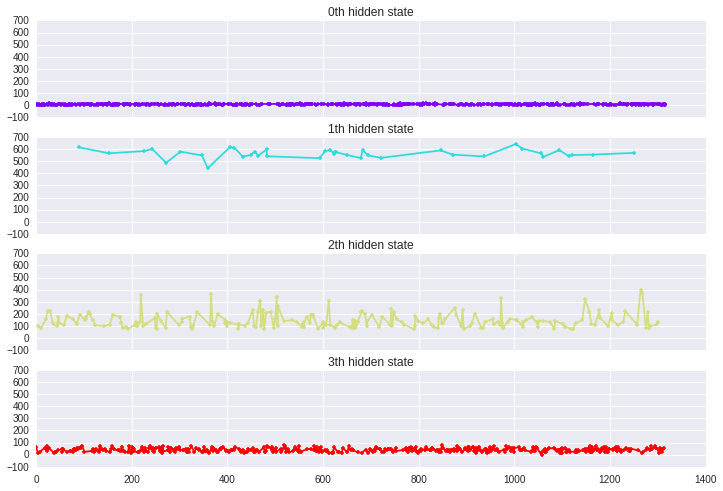

In [10]:
basic3.hmm_earth('depth',4,200)

Now look at the depth patterns shown above, we find the earthquakes can be classified as three 
categories. 
* shallow, < 20 km
* intermediate depth, 50km
* deep earthquakes, 120km
* ultra deep earthquakes, 580 km.

Mantle structure from Wiki:

"The mantle is divided into sections which are based upon results from seismology. These layers (and their thicknesses/depths) are the following: the upper mantle (starting at the Moho, or base of the crust around 7 to 35 km (4.3 to 21.7 mi) downward to 410 km (250 mi)),[23] the transition zone (410–660 km or 250–410 mi), the lower mantle (660–2,891 km or 410–1,796 mi), and anomalous core–mantle boundary with a variable thickness (on average ~200 km (120 mi) thick)."

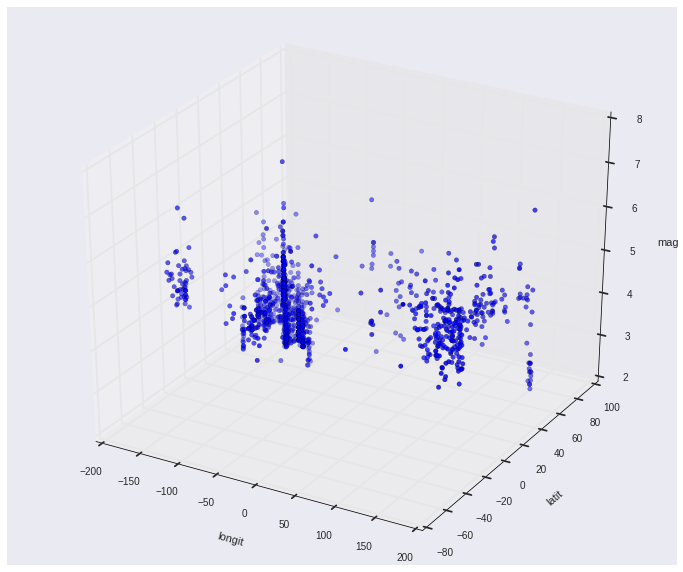

In [12]:
basic3.scatter_3d_feature('longit','latit','mag')

In [13]:
basic3.scatter_3d_feature_ply('longit','latit','mag')

In [14]:
basic3.scatter_3d_feature_ply('longit','latit','depth')

In [15]:
basic3.scatter_3d_feature_ply('longit','latit','sig')

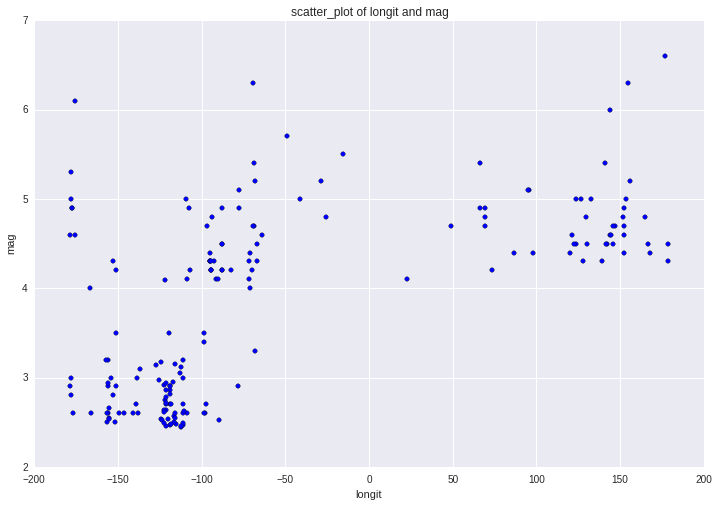

In [12]:
basic1w.scatter_feature('longit','mag')

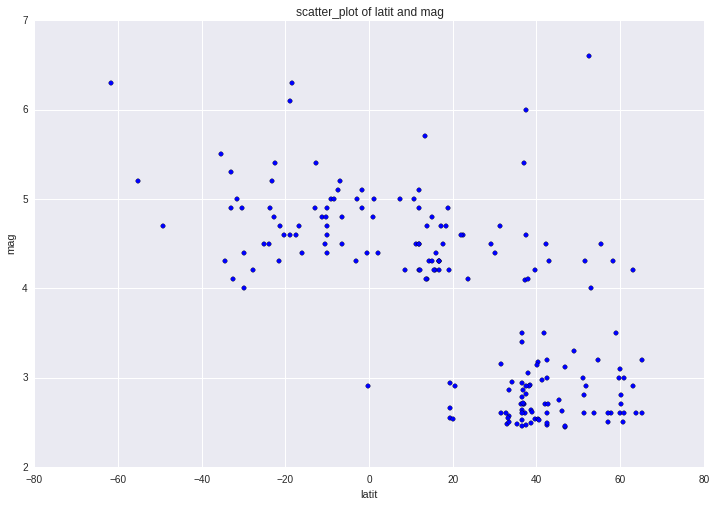

In [13]:
basic1w.scatter_feature('latit','mag')

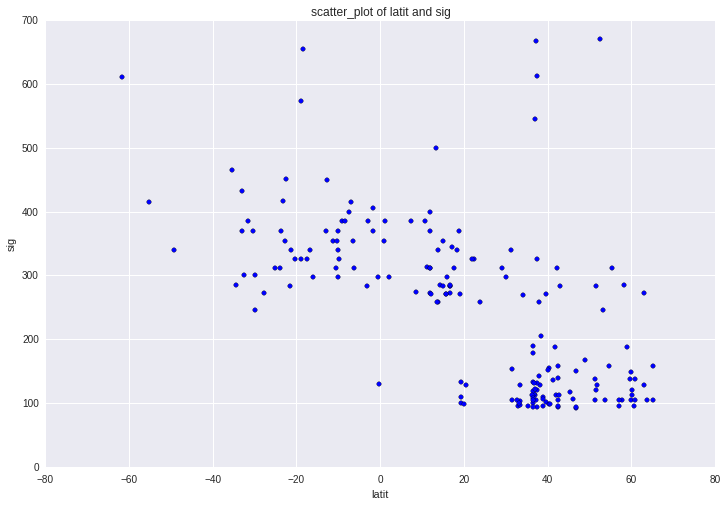

In [14]:
basic1w.scatter_feature('latit','sig')

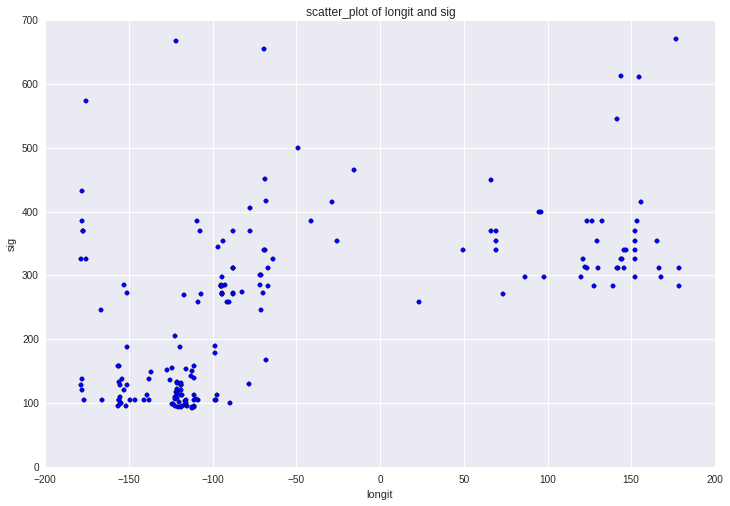

In [15]:
basic1w.scatter_feature('longit','sig')